# MobileNet Implementation with TensorFlow

## Download CIFAR10

In [1]:
import numpy as np
from tensorflow.keras.datasets.cifar10 import load_data

In [2]:
(trainX, trainY), (testX, testY) = load_data()

In [3]:
print(trainX.shape)
print(testX.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
print(trainY.shape)
print(testY.shape)

(50000, 1)
(10000, 1)


In [31]:
train_num = int(len(trainX)*0.9)
valid_num = len(trainX) - train_num

In [33]:
validX = trainX[-valid_num:]
validY = trainY[-valid_num:]

trainX = trainX[:train_num]
trainY = trainY[:train_num]

## Construct Model

In [6]:
import tensorflow as tf

In [7]:
from tensorflow.keras.layers import Input, Conv2D, DepthwiseConv2D, MaxPool2D, Dense
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.activations import relu
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [8]:
input_shape = trainX.shape[1:]
channels=[16,16,32,64,128]

In [20]:
input_tensor = Input(input_shape)

x = Conv2D(filters=channels[0], kernel_size=(7,7), padding='same', activation=None, use_bias=False, kernel_initializer='he_uniform')(input_tensor)
x = BatchNormalization()(x)
x = relu(x)

x = DepthwiseConv2D(kernel_size=(3,3), padding='same', activation=None, use_bias=False, kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = relu(x)
x = Conv2D(filters=channels[1], kernel_size=(1,1), padding='same', activation=None, use_bias=False, kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = relu(x)

x = MaxPool2D((2,2))(x)

x = DepthwiseConv2D(kernel_size=(3,3), padding='same', activation=None, use_bias=False, kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = relu(x)
x = Conv2D(filters=channels[2], kernel_size=(1,1), padding='same', activation=None, use_bias=False, kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = relu(x)

x = MaxPool2D((2,2))(x)

x = DepthwiseConv2D(kernel_size=(3,3), padding='same', activation=None, use_bias=False, kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = relu(x)
x = Conv2D(filters=channels[3], kernel_size=(1,1), padding='same', activation=None, use_bias=False, kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = relu(x)

x = MaxPool2D((2,2))(x)

x = DepthwiseConv2D(kernel_size=(3,3), padding='same', activation=None, use_bias=False, kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = relu(x)
x = Conv2D(filters=channels[4], kernel_size=(1,1), padding='same', activation=None, use_bias=False, kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = relu(x)

x = GlobalAveragePooling2D()(x)

x = Dense(channels[4]//4, activation=None, use_bias=False, kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = relu(x)
x = Dense(10, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=x)

optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 16)        2352      
_________________________________________________________________
batch_normalization_10 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
tf.nn.relu_10 (TFOpLambda)   (None, 32, 32, 16)        0         
_________________________________________________________________
depthwise_conv2d_4 (Depthwis (None, 32, 32, 16)        144       
_________________________________________________________________
batch_normalization_11 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
tf.nn.relu_11 (TFOpLambda)   (None, 32, 32, 16)        0   

In [21]:
from tensorflow.keras.callbacks import LearningRateScheduler

lr = LearningRateScheduler(lambda epoch: 0.01*(0.95 ** epoch), verbose=1)

In [22]:
history=model.fit(trainX, trainY, batch_size=128, epochs=10, validation_data=(validX, validY), callbacks=[lr])

Epoch 1/10
 24/313 [=>............................] - ETA: 35s - loss: 2.2497 - accuracy: 0.1966

KeyboardInterrupt: 

In [12]:
test_loss, test_acc = model.evaluate(testX, testY, verbose=1)

313/313 [==============================] - 3s 9ms/step - loss: 1.2702 - accuracy: 0.5961


In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Plot Training Loss and Validation loss 

In [13]:
import matplotlib.pyplot as plt
import numpy as np

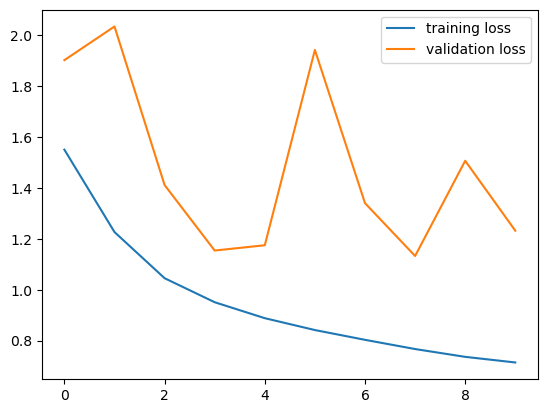

In [23]:
plt.figure()
plt.plot(np.arange(10), history.history['loss'], label='training loss')
plt.plot(np.arange(10), history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()